### About Dataset
    This dataset contains data of Quikr Cars about second hand cars . This data was web scrapped from their website and have data of about 1000 cars and have features like
    -Name
    -Company
    -Quikr Label (Platinum / Gold)
    -Location
    -Price
    -Kms driven
    -Fuel type

In [1]:
file = r'Quikr_car.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv(file)
raw_data.head()

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda


In [4]:
raw_data.drop(columns=['Unnamed: 0', 'Label', 'Company'], inplace=True)

In [5]:
raw_data.head()

,Name,Location,Price,Kms_driven,Fuel_type,Owner,Year
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015
1,Maruti Suzuki Wagon R VXI BS IV - 2016,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018
3,Hyundai Venue - 2019,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019
4,Honda Jazz - 2017,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017


### finding null values

In [6]:
raw_data.shape

(1032, 7)

In [7]:
raw_data.isna().sum()

Name            0
Location        2
Price           0
Kms_driven      0
Fuel_type       0
Owner         292
Year            0
dtype: int64

In [8]:
raw_data.duplicated().sum()

11

In [9]:
raw_data.drop_duplicates(inplace=True)

### Quality of data
    need to extract model from name
    Location has 2 none value
    price is in string format
    km column is in string format
    owner have 292 none values

### Cleaning

In [10]:
def extract_model(obj):
    string = ''
    obj_list = obj.split(' ')[:3]
    string = ' '.join(obj_list)
    obj_list1 = string.split('-')[0]
    string = ''.join(obj_list1)
    return string

In [11]:
raw_data['Name'] = raw_data['Name'].apply(extract_model)

In [12]:
def price_mapper(obj):
    try:
        new_obj = obj.split('₹')[1].replace(',','')
        return int(new_obj)
    except Exception as e:
        print(e, 'object : ', obj)
        return 0

In [13]:
raw_data['Price'] = raw_data['Price'].apply(price_mapper)
raw_data['Price'] = raw_data['Price'].astype(int)

list index out of range object :  Ask For Price
list index out of range object :  Ask For Price
list index out of range object :  Ask For Price
list index out of range object :  Ask For Price
list index out of range object :  Ask For Price
list index out of range object :  Ask For Price


In [14]:
def km_maper(obj):
    try:
        new_obj = obj.split(' ')[0].replace(',', '')
        return int(new_obj)
    except Exception as e:
        print(e, 'object : ', obj)
        return 0

In [15]:
raw_data['Kms_driven'] = raw_data['Kms_driven'].apply(km_maper)
raw_data['Kms_driven'] = raw_data['Kms_driven'].astype(int)

In [16]:

raw_data['Owner'].unique()

array([nan, ' 2nd Owner', ' 1st Owner', ' 3rd Owner'], dtype=object)

In [17]:
raw_data['Owner']=raw_data['Owner'].map({' 2nd Owner':2, ' 1st Owner':1, ' 3rd Owner':3})
raw_data['Owner'].fillna(0, inplace=True)
raw_data['Owner'] = raw_data['Owner'].astype(int)

In [18]:
raw_data.dropna(axis=0, inplace=True)

In [19]:
raw_data['Fuel_type'] = raw_data['Fuel_type'].apply(lambda a: a.replace(' ', ''))

### Checking again

In [20]:
raw_data.isna().sum()

Name          0
Location      0
Price         0
Kms_driven    0
Fuel_type     0
Owner         0
Year          0
dtype: int64

In [21]:
raw_data.dtypes

Name          object
Location      object
Price          int32
Kms_driven     int32
Fuel_type     object
Owner          int32
Year           int64
dtype: object

In [22]:
raw_data.shape

(1019, 7)

In [23]:
raw_data.head()

,Name,Location,Price,Kms_driven,Fuel_type,Owner,Year
0,Ford Figo Duratec,Bangalore,380000,35056,Petrol,0,2015
1,Maruti Suzuki Wagon,Bangalore,465000,44000,Petrol,0,2016
2,Hyundai Creta 1.6,Bangalore,1350000,42917,Petrol,0,2018
3,Hyundai Venue,Chennai,1019699,16112,Petrol,2,2019
4,Honda Jazz,Pune,713499,30988,Petrol,2,2017


### Numerical and categorical divide

In [24]:
numerical_features = [i for i in raw_data.columns if raw_data[i].dtype!='O']
categorical_features = [i for i in raw_data.columns if raw_data[i].dtype=='O']

### finding outliers in all numericals

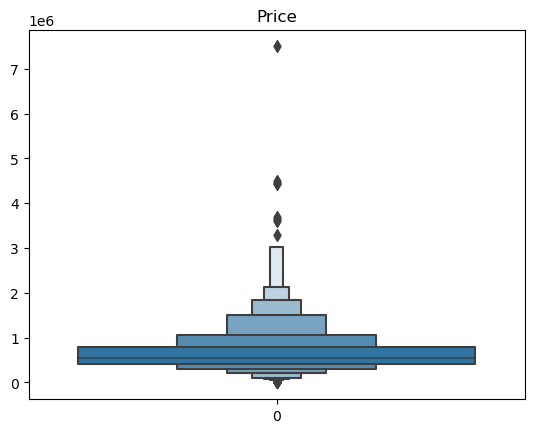

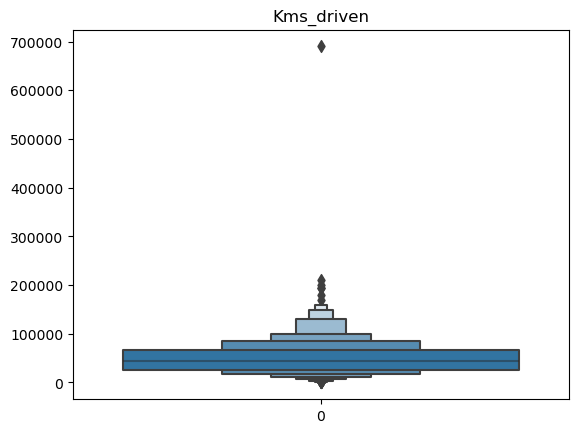

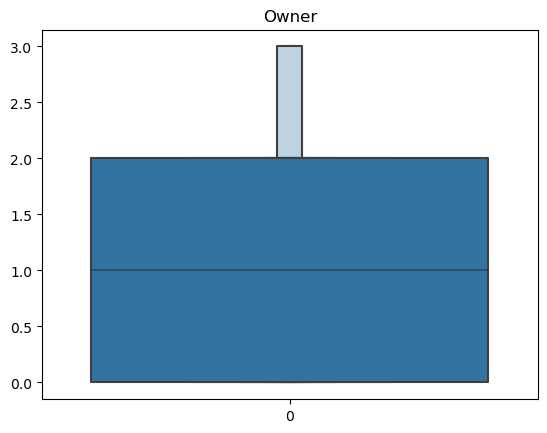

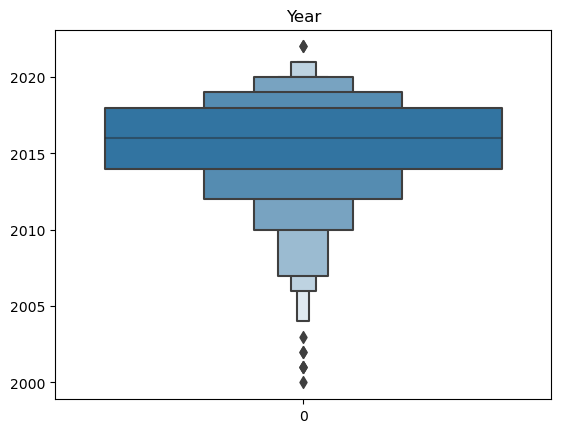

In [25]:
for i in numerical_features:
    sns.boxenplot(raw_data[i])
    plt.title(i)
    plt.show()

##### Price have two outliers most outer outlier can effect data badly so have to drop that column
##### km driven have a bad outlier i have to drop

In [26]:
raw_data[raw_data['Price']==raw_data['Price'].max()]

,Name,Location,Price,Kms_driven,Fuel_type,Owner,Year
718,Mercedes Benz GLE,Mumbai,7500000,35000,Petrol,0,2019


In [27]:
raw_data.drop(718, axis=0, inplace=True)

In [28]:
raw_data[raw_data['Price']==raw_data['Price'].max()]

,Name,Location,Price,Kms_driven,Fuel_type,Owner,Year
928,Land Rover Range,Chennai,4490000,51000,Diesel,0,2017


In [29]:
raw_data[raw_data['Kms_driven']==raw_data['Kms_driven'].max()]

,Name,Location,Price,Kms_driven,Fuel_type,Owner,Year
355,Mahindra Scorpio LX,Chennai,495000,690000,Diesel,0,2013


In [30]:
raw_data.drop(355, axis=0, inplace=True)

In [31]:
raw_data[raw_data['Kms_driven']==raw_data['Kms_driven'].max()]

,Name,Location,Price,Kms_driven,Fuel_type,Owner,Year
931,Toyota Innova 2.5,Bangalore,1175000,210000,Diesel,1,2013


In [32]:
len(raw_data['Name'].unique())

228

In [33]:
raw_data.columns

Index(['Name', 'Location', 'Price', 'Kms_driven', 'Fuel_type', 'Owner',
       'Year'],
      dtype='object')

In [34]:
raw_data = raw_data[['Name', 'Location', 'Kms_driven', 'Fuel_type', 'Owner','Year', 'Price']]
raw_data.to_csv('data.csv', index=None)
data = pd.read_csv('data.csv')

In [35]:
data.head()

,Name,Location,Kms_driven,Fuel_type,Owner,Year,Price
0,Ford Figo Duratec,Bangalore,35056,Petrol,0,2015,380000
1,Maruti Suzuki Wagon,Bangalore,44000,Petrol,0,2016,465000
2,Hyundai Creta 1.6,Bangalore,42917,Petrol,0,2018,1350000
3,Hyundai Venue,Chennai,16112,Petrol,2,2019,1019699
4,Honda Jazz,Pune,30988,Petrol,2,2017,713499


In [36]:
x = data.drop('Price', axis=1)
y = data['Price']

### km driven, fuel type, owenr changed to price plot

<Axes: xlabel='Kms_driven', ylabel='Price'>

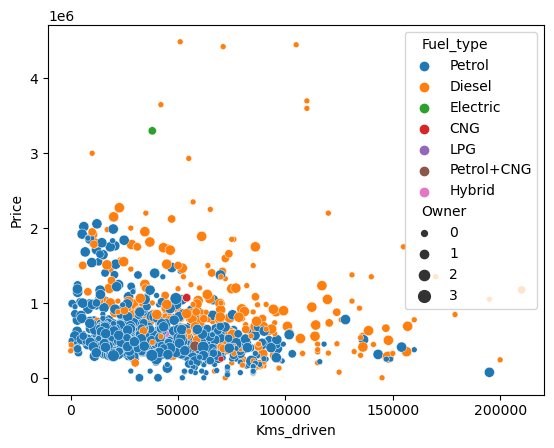

In [37]:
sns.scatterplot(data=data, x='Kms_driven', y=y, hue='Fuel_type', size='Owner')

from the above plot i can clearify that disel cars with first hand or second hand is more costly  
compared to petrol cars are not that costly compared to diesel  
third hand or second hand cars are really cost effective  

### univariate and bivariate analysis

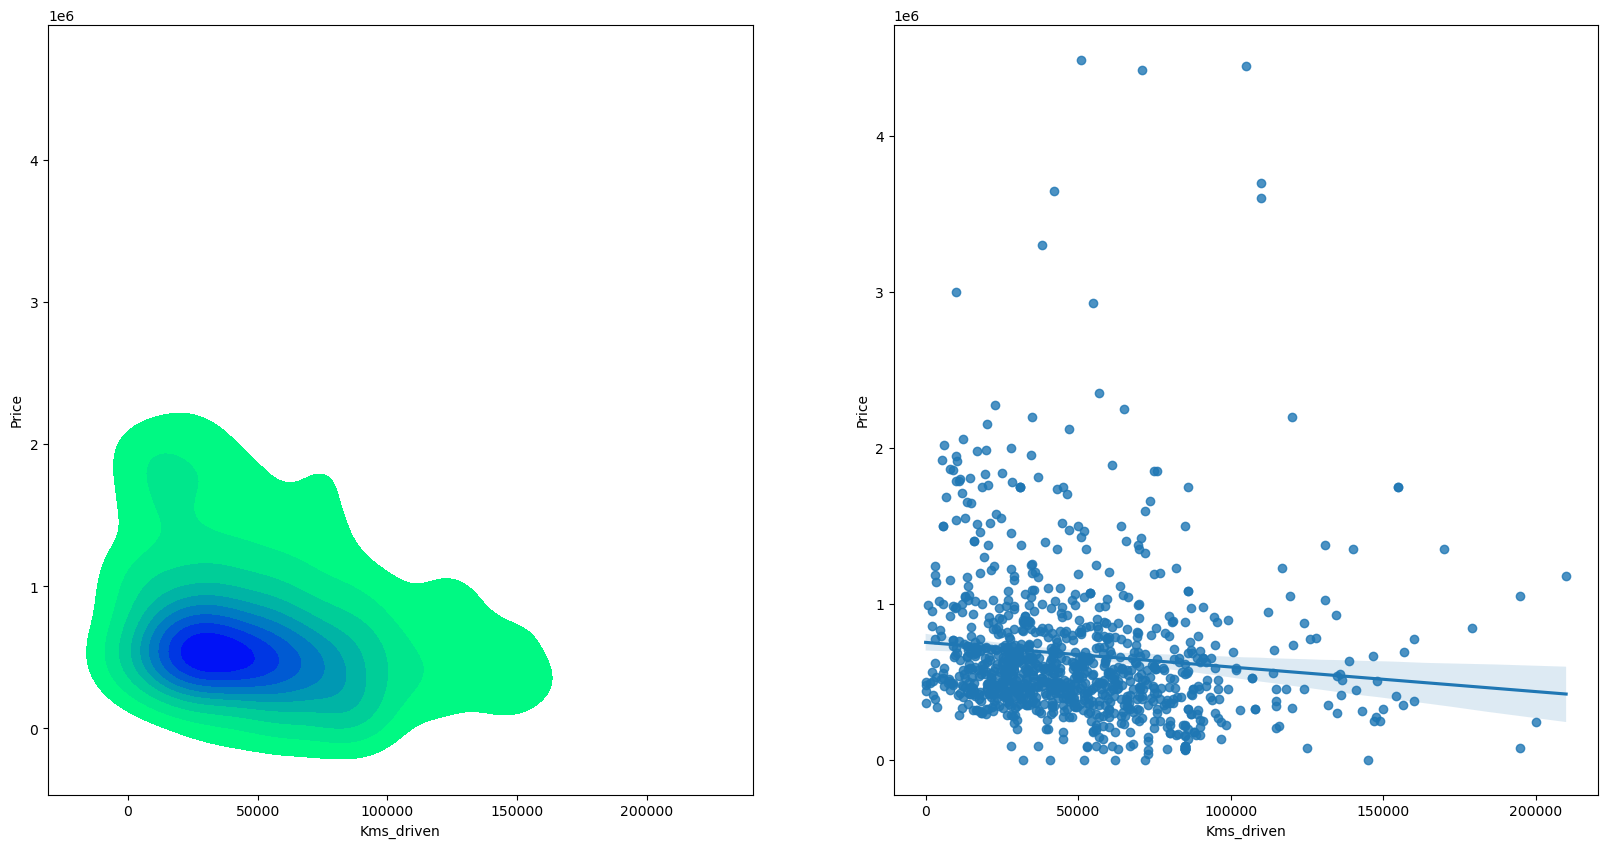

In [38]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
sns.kdeplot(data=data, x='Kms_driven', y=y, fill=True, cmap = "winter_r")
plt.subplot(122)
sns.regplot(data=data, x='Kms_driven', y=y)
plt.show()

km driven has negative correlation with price  
if km increases price decreases on the basis of model

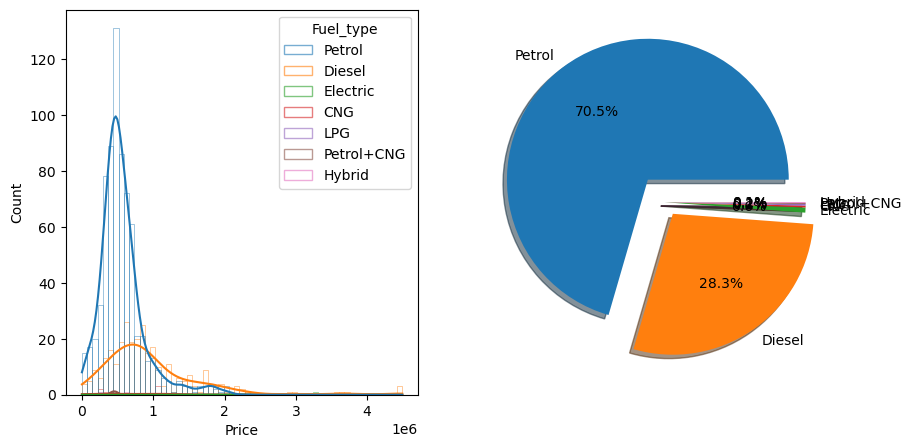

In [39]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=data, x='Price', hue='Fuel_type', kde=True, alpha=0.6, fill=False)
plt.subplot(122)
values=data['Fuel_type'].value_counts()
labels=['Petrol', 'Diesel', 'Electric', 'CNG', 'LPG', 'Petrol+CNG','Hybrid']
plt.pie(
    values, labels=labels, 
    autopct = '%1.1f%%',shadow=True,
    explode=[0.2,0.1,0,0,0,0,0]
)
plt.show()

Petrol cars selled most and holded a high price

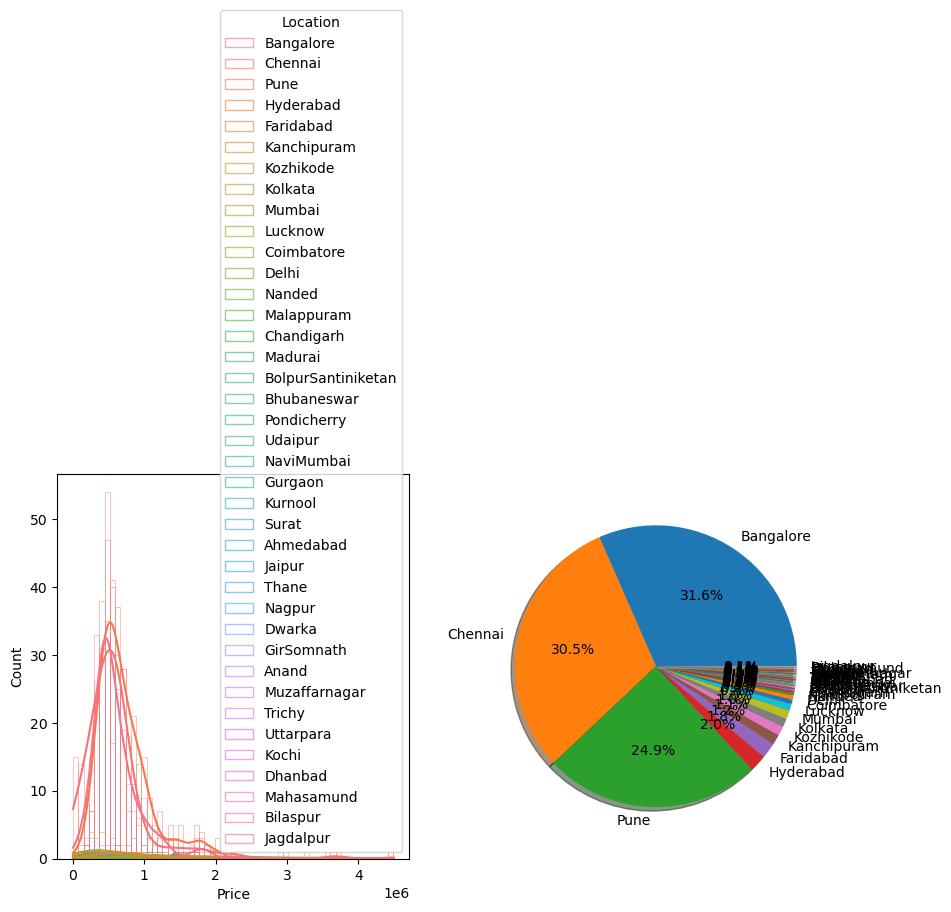

In [40]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=data, x='Price', hue='Location', kde=True, alpha=0.6, fill=False)
plt.subplot(122)
values=data['Location'].value_counts()
labels=['Bangalore', 'Chennai', 'Pune', 'Hyderabad', 'Faridabad',
       'Kanchipuram', 'Kozhikode', 'Kolkata', 'Mumbai', 'Lucknow',
       'Coimbatore', 'Delhi', 'Nanded', 'Malappuram', 'Chandigarh',
       'Madurai', 'BolpurSantiniketan', 'Bhubaneswar', 'Pondicherry',
       'Udaipur', 'NaviMumbai', 'Gurgaon', 'Kurnool', 'Surat',
       'Ahmedabad', 'Jaipur', 'Thane', 'Nagpur', 'Dwarka', 'GirSomnath',
       'Anand', 'Muzaffarnagar', 'Trichy', 'Uttarpara', 'Kochi',
       'Dhanbad', 'Mahasamund', 'Bilaspur', 'Jagdalpur']
plt.pie(
    values, labels=labels, 
    autopct = '%1.1f%%',shadow=True
)
plt.show()

most cares selled in chennai, bangalore, pune and also got high price in those area

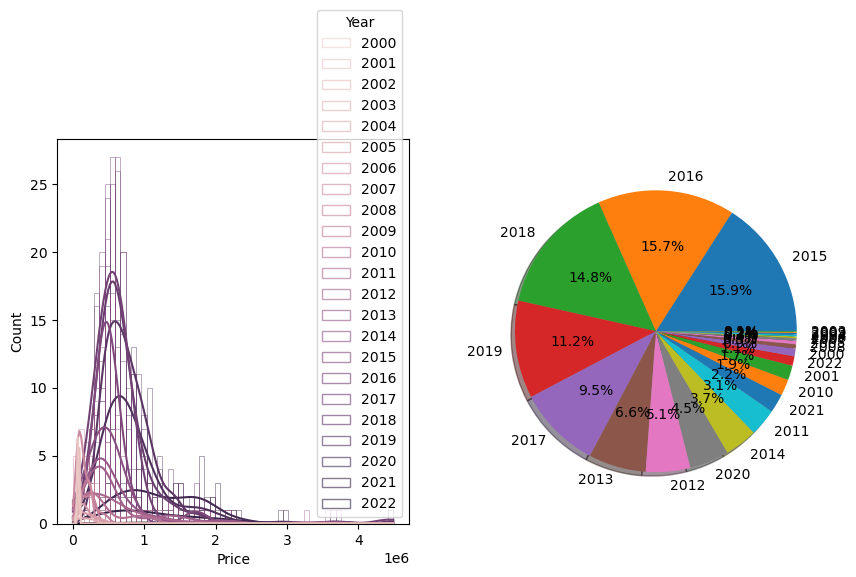

In [41]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=data, x='Price', hue='Year', kde=True, alpha=0.6, fill=False)
plt.subplot(122)
values=data['Year'].value_counts()
labels=[2015, 2016, 2018, 2019, 2017, 2013, 2012, 2020, 2014, 2011, 2021,
       2010, 2001, 2022, 2000, 2008, 2005, 2007, 2006, 2004, 2002, 2009,
       2003]
plt.pie(
    values, labels=labels, 
    autopct = '%1.1f%%',shadow=True
)
plt.show()

from the above graph i can tell that 2015-2019 maximum cars purchased

In [45]:
from ydata_profiling import ProfileReport

In [46]:
pf = ProfileReport(data)

In [47]:
pf.to_widgets()

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]